# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Reading from data.csv

In [2]:
file="data.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [4]:
df.shape

(42000, 785)

In [5]:
y = df['label']
x = df.drop('label', axis = 1)

4


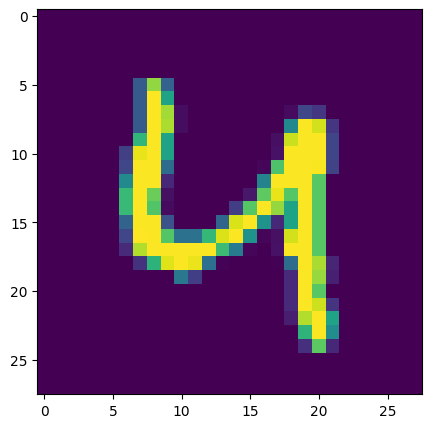

In [29]:
plt.figure(figsize=(5,5))
row = 420
row_img = x.iloc[row].to_numpy()
plt.imshow(np.reshape(row_img, (28,28)))
print(y[row])

<Axes: xlabel='label', ylabel='count'>

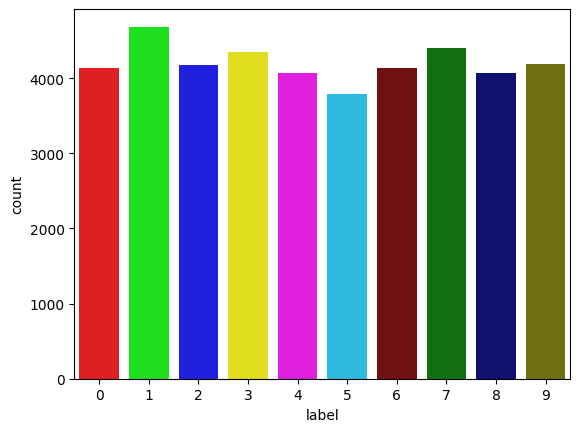

In [20]:
custom_palette = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#11ccff', '#800000', '#008000', '#000080', '#808000']
sb.countplot(x='label', data = df, palette = custom_palette, legend = False, hue = 'label')

# Splitting into training and testing data

``` Train : Test = 60:40 ```

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)

In [270]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# KNN model implementation

``` K = 2 ```

In [271]:
knn = KNeighborsClassifier(n_neighbors=2)  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [272]:
prediction = knn.predict(x_test)
prediction

array([6, 9, 8, ..., 3, 5, 1], dtype=int64)

Accuracy of Model

In [273]:
print(accuracy_score(y_test, prediction))

0.9569642857142857


CLassification Report


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1630
           1       0.95      1.00      0.97      1891
           2       0.96      0.96      0.96      1688
           3       0.93      0.97      0.95      1801
           4       0.95      0.97      0.96      1648
           5       0.94      0.94      0.94      1500
           6       0.98      0.98      0.98      1649
           7       0.95      0.97      0.96      1763
           8       0.99      0.87      0.93      1562
           9       0.97      0.91      0.94      1668

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



Confusion Matrix

In [274]:
print(confusion_matrix(y_test, prediction))

[[1625    0    1    0    0    0    3    0    0    1]
 [   0 1882    4    0    1    0    1    3    0    0]
 [  19   25 1616    4    1    0    0   21    1    1]
 [   3    5   23 1739    1   14    0    5    7    4]
 [   3   22    0    0 1594    0    6    4    0   19]
 [   5    5    2   62    2 1415    5    0    0    4]
 [  16    2    1    0    3   13 1614    0    0    0]
 [   2   24    9    0    8    0    0 1715    0    5]
 [  13   21   18   54    7   52   17    8 1363    9]
 [   9    5    2   11   57   11    2   49    8 1514]]


# **Accuracy of 2NN for 60:40 split : 95.6964%** 

Remaining scenarios for different train:test split and different K-values


**K=2**

70:30 

In [32]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=2)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

75:25

In [33]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=2)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [34]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=2)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [35]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=2)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [36]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=2)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

**K=4**

60:40

In [37]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

70:30

In [38]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

75:25

In [39]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [40]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [41]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [42]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=4)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

**K=5**

60:40

In [43]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

70:30

In [44]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

75:25

In [45]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [46]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [47]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [48]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=5)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

**K=6**

60:40

In [49]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

70:30

In [50]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

75:25

In [51]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [52]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [53]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [54]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=6)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

**K=7**

60:40

In [55]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

70:30

In [56]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

75:25

In [57]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [58]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [59]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [60]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=7)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

**K=10**

60:40

In [61]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=10)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

70:30

In [62]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=10)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

80:20

In [63]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=10)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

90:10

In [64]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=10)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)

95:5

In [65]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 24)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# knn = KNeighborsClassifier(n_neighbors=10)  
# knn.fit(x_train, y_train)
# prediction = knn.predict(x_test)